In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import mysql.connector
import datetime as dt
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
mydb = mysql.connector.connect(
  host=,
  user=,
  password=,
  database=
)

mycursor = mydb.cursor()
#BDemog = pd.read_sql("SELECT * FROM Demographics", con=mydb)
BDrugs = pd.read_sql("SELECT * FROM Drug", con=mydb)
BOutc = pd.read_sql("SELECT * FROM Outcome", con=mydb)
BRPSR = pd.read_sql("SELECT * FROM Reported_Sources", con=mydb)
BDemog = pd.read_csv('/Users/halisyigin/Desktop/health_data/data/DEMO20Q1.csv')

# Drug

In [3]:
BDrugs.columns

Index(['primaryid', 'caseid', 'drug_seq', 'role_cod', 'drugname', 'prod_ai',
       'val_vbm', 'route', 'dose_vbm', 'cum_dose_chr', 'cum_dose_unit',
       'dechal', 'rechal', 'lot_num', 'exp_dt', 'nda_num', 'dose_amt',
       'dose_unit', 'dose_form', 'dose_freq'],
      dtype='object')

In [4]:
BDrugs.head(10)

,primaryid,caseid,drug_seq,role_cod,drugname,prod_ai,val_vbm,route,dose_vbm,cum_dose_chr,cum_dose_unit,dechal,rechal,lot_num,exp_dt,nda_num,dose_amt,dose_unit,dose_form,dose_freq
0,100046942,10004694,1,PS,LIPITOR,ATORVASTATIN CALCIUM,1,Oral,"20 MG, DAILY",,,U,,,,020702,20,MG,FILM-COATED TABLET,
1,100046942,10004694,2,SS,LIPITOR,ATORVASTATIN CALCIUM,1,,,,,U,,,,020702,,,FILM-COATED TABLET,
2,100046942,10004694,3,SS,ATORVASTATIN CALCIUM.,ATORVASTATIN CALCIUM,1,Oral,"20 MG, DAILY",,,U,,,,020702,20,MG,FILM-COATED TABLET,
3,100046942,10004694,4,C,ZOCOR,SIMVASTATIN,1,,(40-80 MG) DAILY,,,,,,,,,,,
4,100046942,10004694,5,C,SIMVASTATIN.,SIMVASTATIN,1,,"40 MG, DAILY",,,,,,,,40,MG,,
5,100048206,10004820,1,PS,DILANTIN,PHENYTOIN,1,Oral,"100 MG, 2X/DAY",,,U,,,,84349,100,MG,"CAPSULE, HARD",BID
6,100048206,10004820,2,SS,DILANTIN,PHENYTOIN,1,Oral,"200 MG, 2X/DAY",,,U,,,,84349,200,MG,"CAPSULE, HARD",BID
7,100048622,10004862,1,PS,LIPITOR,ATORVASTATIN CALCIUM,1,Oral,"20 MG, 1X/DAY",,,U,,,,020702,20,MG,FILM-COATED TABLET,QD
8,100048622,10004862,2,SS,LIPITOR,ATORVASTATIN CALCIUM,1,Oral,"40 MG, 1X/DAY",,,U,,,,020702,40,MG,FILM-COATED TABLET,QD
9,100048622,10004862,3,SS,LIPITOR,ATORVASTATIN CALCIUM,1,Oral,"80 MG, 1X/DAY",,,U,,,,020702,80,MG,FILM-COATED TABLET,QD


In [5]:
Lipitor=BDrugs[(BDrugs.drugname=='LIPITOR')]
Lipitor.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4501 entries, 0 to 1943531
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   primaryid      4501 non-null   int64 
 1   caseid         4501 non-null   int64 
 2   drug_seq       4501 non-null   int64 
 3   role_cod       4501 non-null   object
 4   drugname       4501 non-null   object
 5   prod_ai        4501 non-null   object
 6   val_vbm        4501 non-null   object
 7   route          4501 non-null   object
 8   dose_vbm       4501 non-null   object
 9   cum_dose_chr   4501 non-null   object
 10  cum_dose_unit  4501 non-null   object
 11  dechal         4501 non-null   object
 12  rechal         4501 non-null   object
 13  lot_num        4501 non-null   object
 14  exp_dt         4501 non-null   object
 15  nda_num        4501 non-null   object
 16  dose_amt       4501 non-null   object
 17  dose_unit      4501 non-null   object
 18  dose_form      4501 non-n

In [6]:
Lipitor=Lipitor[['primaryid','drugname']]
Lipitor=Lipitor.drop_duplicates()

In [7]:
Lipitor.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3146 entries, 0 to 1943530
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   primaryid  3146 non-null   int64 
 1   drugname   3146 non-null   object
dtypes: int64(1), object(1)
memory usage: 73.7+ KB


# Outcome

In [8]:
BOutc.columns

Index(['primaryId', 'caseId', 'outc_cod'], dtype='object')

In [9]:
BOutc=BOutc.rename(columns={"primaryId": "primaryid"})

In [10]:
BOutc['outc_cod'].unique()

array(['OT', 'HO', 'DE', 'LT', 'DS', 'CA', 'RI'], dtype=object)

In [11]:
Died = BOutc[['primaryid','outc_cod']].replace({'OT': 0,
                                                              'HO': 0, 
                                                              'DE': 1,
                                                              'LT': 0,
                                                              'DS': 0,
                                                              'CA': 0, 
                                                              'RI': 0})

In [12]:
Died.outc_cod.value_counts()

0    295249
1     40221
Name: outc_cod, dtype: int64

## Join Drug and Outcome

In [13]:
Lip_dead=pd.merge(left=Lipitor, right=Died,on='primaryid',how='left')
Lip_dead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3955 entries, 0 to 3954
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   primaryid  3955 non-null   int64  
 1   drugname   3955 non-null   object 
 2   outc_cod   3198 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 123.6+ KB


In [14]:
Lip_dead.head()

,primaryid,drugname,outc_cod
0,100046942,LIPITOR,0.0
1,100048622,LIPITOR,0.0
2,100051352,LIPITOR,0.0
3,100051382,LIPITOR,0.0
4,100051934,LIPITOR,0.0


In [15]:
Lip_dead.isnull().sum()

primaryid      0
drugname       0
outc_cod     757
dtype: int64

In [16]:
Lip_dead=Lip_dead.fillna(0)

# Demographic Data

In [17]:
BDemog.head()

,primaryid,caseid,caseversion,i_f_code,event.dt1,mfr_dt,init_fda_dt,fda_dt,rept_cod,auth_num,...,age_grp,sex,e_sub,wt,wt_cod,rept.dt1,to_mfr,occp_cod,reporter_country,occr_country
0,100046942,10004694,2,F,NaN,2020-01-08,2014-03-12,2020-01-10,EXP,NaN,...,NaN,F,Y,81.0,KG,2020-01-10,NaN,LW,US,US
1,100048206,10004820,6,F,NaN,2020-03-05,2014-03-12,2020-03-09,EXP,NaN,...,NaN,F,Y,NaN,NaN,2020-03-09,NaN,MD,US,US
2,100048622,10004862,2,F,2005-12-30,2020-03-12,2014-03-12,2020-03-16,EXP,NaN,...,NaN,F,Y,NaN,NaN,2020-03-16,NaN,LW,US,US
3,100051352,10005135,2,F,2006-09-22,2020-02-20,2014-03-12,2020-02-24,EXP,NaN,...,NaN,F,Y,NaN,NaN,2020-02-24,NaN,LW,US,US
4,100051382,10005138,2,F,1999-01-01,2020-01-08,2014-03-12,2020-01-10,EXP,NaN,...,NaN,F,Y,83.0,KG,2020-01-10,NaN,LW,US,US


In [18]:
BDemog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460327 entries, 0 to 460326
Data columns (total 25 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   primaryid         460327 non-null  int64  
 1   caseid            460327 non-null  int64  
 2   caseversion       460327 non-null  int64  
 3   i_f_code          460327 non-null  object 
 4   event.dt1         228204 non-null  object 
 5   mfr_dt            433208 non-null  object 
 6   init_fda_dt       460327 non-null  object 
 7   fda_dt            460327 non-null  object 
 8   rept_cod          460327 non-null  object 
 9   auth_num          27093 non-null   object 
 10  mfr_num           433214 non-null  object 
 11  mfr_sndr          460327 non-null  object 
 12  lit_ref           27325 non-null   object 
 13  age               270155 non-null  float64
 14  age_cod           270168 non-null  object 
 15  age_grp           49034 non-null   object 
 16  sex               41

In [19]:
BDemog.columns

Index(['primaryid', 'caseid', 'caseversion', 'i_f_code', 'event.dt1', 'mfr_dt',
       'init_fda_dt', 'fda_dt', 'rept_cod', 'auth_num', 'mfr_num', 'mfr_sndr',
       'lit_ref', 'age', 'age_cod', 'age_grp', 'sex', 'e_sub', 'wt', 'wt_cod',
       'rept.dt1', 'to_mfr', 'occp_cod', 'reporter_country', 'occr_country'],
      dtype='object')

In [20]:
Demog = BDemog[['primaryid', 'i_f_code','age_grp','event.dt1', 'sex','rept_cod','wt','wt_cod','reporter_country','occr_country']]
Demog.head()

,primaryid,i_f_code,age_grp,event.dt1,sex,rept_cod,wt,wt_cod,reporter_country,occr_country
0,100046942,F,NaN,NaN,F,EXP,81.0,KG,US,US
1,100048206,F,NaN,NaN,F,EXP,NaN,NaN,US,US
2,100048622,F,NaN,2005-12-30,F,EXP,NaN,NaN,US,US
3,100051352,F,NaN,2006-09-22,F,EXP,NaN,NaN,US,US
4,100051382,F,NaN,1999-01-01,F,EXP,83.0,KG,US,US


## Merge Demog and Lipitor_Death

In [21]:
df=pd.merge(left=Lip_dead, right=Demog,on='primaryid',how='left')
df.head()

,primaryid,drugname,outc_cod,i_f_code,age_grp,event.dt1,sex,rept_cod,wt,wt_cod,reporter_country,occr_country
0,100046942,LIPITOR,0.0,F,NaN,NaN,F,EXP,81.0,KG,US,US
1,100048622,LIPITOR,0.0,F,NaN,2005-12-30,F,EXP,NaN,NaN,US,US
2,100051352,LIPITOR,0.0,F,NaN,2006-09-22,F,EXP,NaN,NaN,US,US
3,100051382,LIPITOR,0.0,F,NaN,1999-01-01,F,EXP,83.0,KG,US,US
4,100051934,LIPITOR,0.0,F,NaN,2012-09-10,NaN,EXP,48.0,KG,US,US


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3955 entries, 0 to 3954
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   primaryid         3955 non-null   int64  
 1   drugname          3955 non-null   object 
 2   outc_cod          3955 non-null   float64
 3   i_f_code          3955 non-null   object 
 4   age_grp           269 non-null    object 
 5   event.dt1         2726 non-null   object 
 6   sex               3728 non-null   object 
 7   rept_cod          3955 non-null   object 
 8   wt                1939 non-null   float64
 9   wt_cod            1939 non-null   object 
 10  reporter_country  3955 non-null   object 
 11  occr_country      3955 non-null   object 
dtypes: float64(2), int64(1), object(9)
memory usage: 401.7+ KB


In [23]:
df['event.dt1'] = pd.to_datetime(df['event.dt1'])

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3955 entries, 0 to 3954
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   primaryid         3955 non-null   int64         
 1   drugname          3955 non-null   object        
 2   outc_cod          3955 non-null   float64       
 3   i_f_code          3955 non-null   object        
 4   age_grp           269 non-null    object        
 5   event.dt1         2726 non-null   datetime64[ns]
 6   sex               3728 non-null   object        
 7   rept_cod          3955 non-null   object        
 8   wt                1939 non-null   float64       
 9   wt_cod            1939 non-null   object        
 10  reporter_country  3955 non-null   object        
 11  occr_country      3955 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(8)
memory usage: 401.7+ KB


# Cleaning

### Replace lipitor with 1

In [25]:
df['drugname']=df['drugname'].replace({'LIPITOR': 1})

In [26]:
df.i_f_code.unique()

array(['F', 'I'], dtype=object)

### Fill nan values in age group with unknown

In [27]:
df.age_grp.unique()

array([nan, 'A', 'E'], dtype=object)

In [28]:
df.age_grp = df.age_grp.fillna('UNK')

### Fill nan values in sex with unknown

In [29]:
df.sex.unique()

array(['F', nan, 'M'], dtype=object)

In [30]:
df.sex = df.sex.fillna('UNK')

### Fill nan values in weight with mean of KG

In [31]:
df.wt_cod.unique()

array(['KG', nan, 'LBS'], dtype=object)

In [32]:
df.wt_cod.value_counts()

KG     1935
LBS       4
Name: wt_cod, dtype: int64

In [33]:
pound=df[df.wt_cod=='LBS']

In [34]:
pound.head()

,primaryid,drugname,outc_cod,i_f_code,age_grp,event.dt1,sex,rept_cod,wt,wt_cod,reporter_country,occr_country
2157,172487971,1,0.0,I,UNK,2019-12-14,M,DIR,118.0,LBS,US,US
2625,173475581,1,0.0,I,UNK,2019-12-06,F,DIR,120.0,LBS,US,US
2626,173475581,1,0.0,I,UNK,2019-12-06,F,DIR,120.0,LBS,US,US
2627,173475581,1,0.0,I,UNK,2019-12-06,F,DIR,120.0,LBS,US,US


In [35]:
meankg=round(df[df.wt_cod=='KG'].wt.mean())
meankg

83

In [36]:
df.wt=df.wt.fillna(83)
df.wt_cod=df.wt_cod.fillna('KG')

In [37]:
df.rept_cod.unique()

array(['EXP', 'PER', 'DIR'], dtype=object)

In [38]:
df.reporter_country.unique()

array(['US', 'CA', 'JP', 'BR', 'IL', 'COUNTRY NOT SPECIFIED', 'BE', 'AU',
       'KR', 'NO', 'PR', 'CN', 'TR', 'IE', 'SE', 'GT', 'HN', 'HK', 'KW',
       'MX', 'LB', 'NL', 'GR', 'GB', 'AF', 'TW', 'CH', 'TH'], dtype=object)

In [39]:
df.occr_country.unique()

array(['US', 'CA', 'JP', 'BR', 'IL', 'BE', 'AU', 'KR', 'NO', 'PR', 'CN',
       'TR', 'SE', 'GT', 'HN', 'HK', 'KW', 'MX', 'LB', 'NL', 'GR', 'GB',
       'AF', 'SG', 'IE', 'TW', 'TH'], dtype=object)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3955 entries, 0 to 3954
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   primaryid         3955 non-null   int64         
 1   drugname          3955 non-null   int64         
 2   outc_cod          3955 non-null   float64       
 3   i_f_code          3955 non-null   object        
 4   age_grp           3955 non-null   object        
 5   event.dt1         2726 non-null   datetime64[ns]
 6   sex               3955 non-null   object        
 7   rept_cod          3955 non-null   object        
 8   wt                3955 non-null   float64       
 9   wt_cod            3955 non-null   object        
 10  reporter_country  3955 non-null   object        
 11  occr_country      3955 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(7)
memory usage: 401.7+ KB


In [41]:
df=df.sort_values(by=['primaryid'], ascending = True)
df.head(20)

,primaryid,drugname,outc_cod,i_f_code,age_grp,event.dt1,sex,rept_cod,wt,wt_cod,reporter_country,occr_country
3810,68189135,1,0.0,F,UNK,NaT,M,EXP,83.00,KG,NO,NO
3809,68189135,1,0.0,F,UNK,NaT,M,EXP,83.00,KG,NO,NO
3815,71855114,1,0.0,F,UNK,2009-01-01,F,EXP,83.00,KG,NL,NL
3816,71855114,1,0.0,F,UNK,2009-01-01,F,EXP,83.00,KG,NL,NL
3826,86164526,1,0.0,F,UNK,2007-10-10,F,EXP,64.90,KG,US,US
3825,86164526,1,0.0,F,UNK,2007-10-10,F,EXP,64.90,KG,US,US
3827,86164526,1,0.0,F,UNK,2007-10-10,F,EXP,64.90,KG,US,US
3830,87747743,1,0.0,F,UNK,NaT,F,EXP,45.81,KG,US,US
3831,91037475,1,0.0,F,A,2011-01-01,F,PER,83.00,KG,BR,BR
3832,91037475,1,0.0,F,A,2011-01-01,F,PER,83.00,KG,BR,BR


In [42]:
df['Event_Year'] = df['event.dt1'].dt.year
df['Event_Month'] = df['event.dt1'].dt.month
df['Event_Day'] = df['event.dt1'].dt.day

In [43]:
df.head()

,primaryid,drugname,outc_cod,i_f_code,age_grp,event.dt1,sex,rept_cod,wt,wt_cod,reporter_country,occr_country,Event_Year,Event_Month,Event_Day
3810,68189135,1,0.0,F,UNK,NaT,M,EXP,83.0,KG,NO,NO,NaN,NaN,NaN
3809,68189135,1,0.0,F,UNK,NaT,M,EXP,83.0,KG,NO,NO,NaN,NaN,NaN
3815,71855114,1,0.0,F,UNK,2009-01-01,F,EXP,83.0,KG,NL,NL,2009.0,1.0,1.0
3816,71855114,1,0.0,F,UNK,2009-01-01,F,EXP,83.0,KG,NL,NL,2009.0,1.0,1.0
3826,86164526,1,0.0,F,UNK,2007-10-10,F,EXP,64.9,KG,US,US,2007.0,10.0,10.0


In [44]:
df.Event_Year.value_counts().head(1)

2019.0    864
Name: Event_Year, dtype: int64

In [45]:
df.Event_Month.value_counts().head(1)

1.0    875
Name: Event_Month, dtype: int64

In [46]:
df.Event_Day.value_counts().head(1)

1.0    1173
Name: Event_Day, dtype: int64

In [47]:
df.Event_Year=df.Event_Year.fillna(2019)
df.Event_Month=df.Event_Month.fillna(1)
df.Event_Day=df.Event_Day.fillna(1)

In [48]:
df=df.drop('event.dt1', axis=1)

In [49]:
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3326 entries, 3810 to 1876
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   primaryid         3326 non-null   int64  
 1   drugname          3326 non-null   int64  
 2   outc_cod          3326 non-null   float64
 3   i_f_code          3326 non-null   object 
 4   age_grp           3326 non-null   object 
 5   sex               3326 non-null   object 
 6   rept_cod          3326 non-null   object 
 7   wt                3326 non-null   float64
 8   wt_cod            3326 non-null   object 
 9   reporter_country  3326 non-null   object 
 10  occr_country      3326 non-null   object 
 11  Event_Year        3326 non-null   float64
 12  Event_Month       3326 non-null   float64
 13  Event_Day         3326 non-null   float64
dtypes: float64(5), int64(2), object(7)
memory usage: 389.8+ KB


In [50]:
df.to_csv(r'/Users/halisyigin/Desktop/health_data/data/LIPITOR.csv', index = False)

# Preprocessing

### Convert categorical columns to numerical columns

In [51]:
pre_df = pd.get_dummies(df,drop_first=True)
pre_df.head()

,primaryid,drugname,outc_cod,wt,Event_Year,Event_Month,Event_Day,i_f_code_I,age_grp_E,age_grp_UNK,...,occr_country_MX,occr_country_NL,occr_country_NO,occr_country_PR,occr_country_SE,occr_country_SG,occr_country_TH,occr_country_TR,occr_country_TW,occr_country_US
3810,68189135,1,0.0,83.00,2019.0,1.0,1.0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
3815,71855114,1,0.0,83.00,2009.0,1.0,1.0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
3826,86164526,1,0.0,64.90,2007.0,10.0,10.0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3830,87747743,1,0.0,45.81,2019.0,1.0,1.0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3831,91037475,1,0.0,83.00,2011.0,1.0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
pre_df.shape

(3326, 68)

In [53]:
feature_cols=pre_df.drop(['outc_cod'],axis=1)
X=feature_cols
y=df['outc_cod']

### Handle with imblance dataset

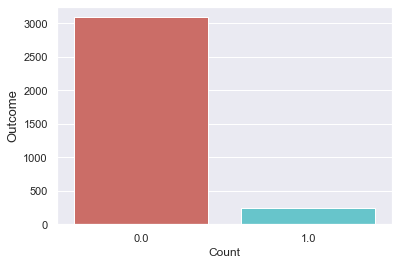

Not Death :  3089
Death :  237
Death Ratio :  0.07


In [54]:
sns.countplot(x = 'outc_cod', data=df, palette='hls')
plt.xlabel('Count', fontsize=12)
plt.ylabel('Outcome', fontsize=13)
plt.show()
print("Not Death : ", len(df[df['outc_cod']==0]))
print("Death : ", len(df[df['outc_cod']==1]))
print("Death Ratio : ", round((len(df[df['outc_cod']==1])/len(df['outc_cod'])),2))

In [55]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.model_selection import train_test_split, cross_val_score

In [56]:
over = SMOTE()
under = RandomUnderSampler()

In [57]:
from imblearn.pipeline import make_pipeline
steps = [('o', over), ('u', under)]
pipeline = make_pipeline(over,under)

In [58]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3)

In [59]:
counter = Counter(y_train)
print('Before we handle with imblance date', counter)

Before we handle with imblance date Counter({0.0: 2154, 1.0: 174})


In [60]:
X_train, y_train= pipeline.fit_resample(X_train, y_train)

In [61]:
counter = Counter(y_train)
print('After we handle with imblance date',counter)

After we handle with imblance date Counter({0.0: 2154, 1.0: 2154})


# Modelling

In [62]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [63]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.25)

In [64]:
pipe_steps = [('scaler', StandardScaler()), ('decsT', DecisionTreeClassifier())]

check_params = {'decsT__criterion':['gini', 'entropy'], 
               'decsT__max_depth': np.arange(4, 15)}

pipeline = Pipeline(pipe_steps)

In [65]:
import warnings
warnings.filterwarnings("ignore")

for cv in range(3, 6):
    create_grid = GridSearchCV(pipeline, param_grid=check_params, cv=cv)
    create_grid.fit(X_train, y_train)
    print("score for %d fold CV := %3.2f" %(cv, create_grid.score(X_test, y_test)))
    print ("!!!! best fit parameters from GridSearchCV !!!!")
    print (create_grid.best_params_)

score for 3 fold CV := 0.92
!!!! best fit parameters from GridSearchCV !!!!
{'decsT__criterion': 'entropy', 'decsT__max_depth': 4}
score for 4 fold CV := 0.92
!!!! best fit parameters from GridSearchCV !!!!
{'decsT__criterion': 'entropy', 'decsT__max_depth': 4}
score for 5 fold CV := 0.92
!!!! best fit parameters from GridSearchCV !!!!
{'decsT__criterion': 'gini', 'decsT__max_depth': 4}


## Best Model

In [66]:
DecsTreeModel = DecisionTreeClassifier(criterion='entropy', max_depth=4)
DecsTreeModel.fit(X_train, y_train)
train_score = DecsTreeModel.score(X_train, y_train)
print ("score on the training data: ", train_score)

test_score = DecsTreeModel.score(X_test, y_test)
print ("score on the test data: ", test_score)

score on the training data:  0.9310344827586207
score on the test data:  0.9206730769230769


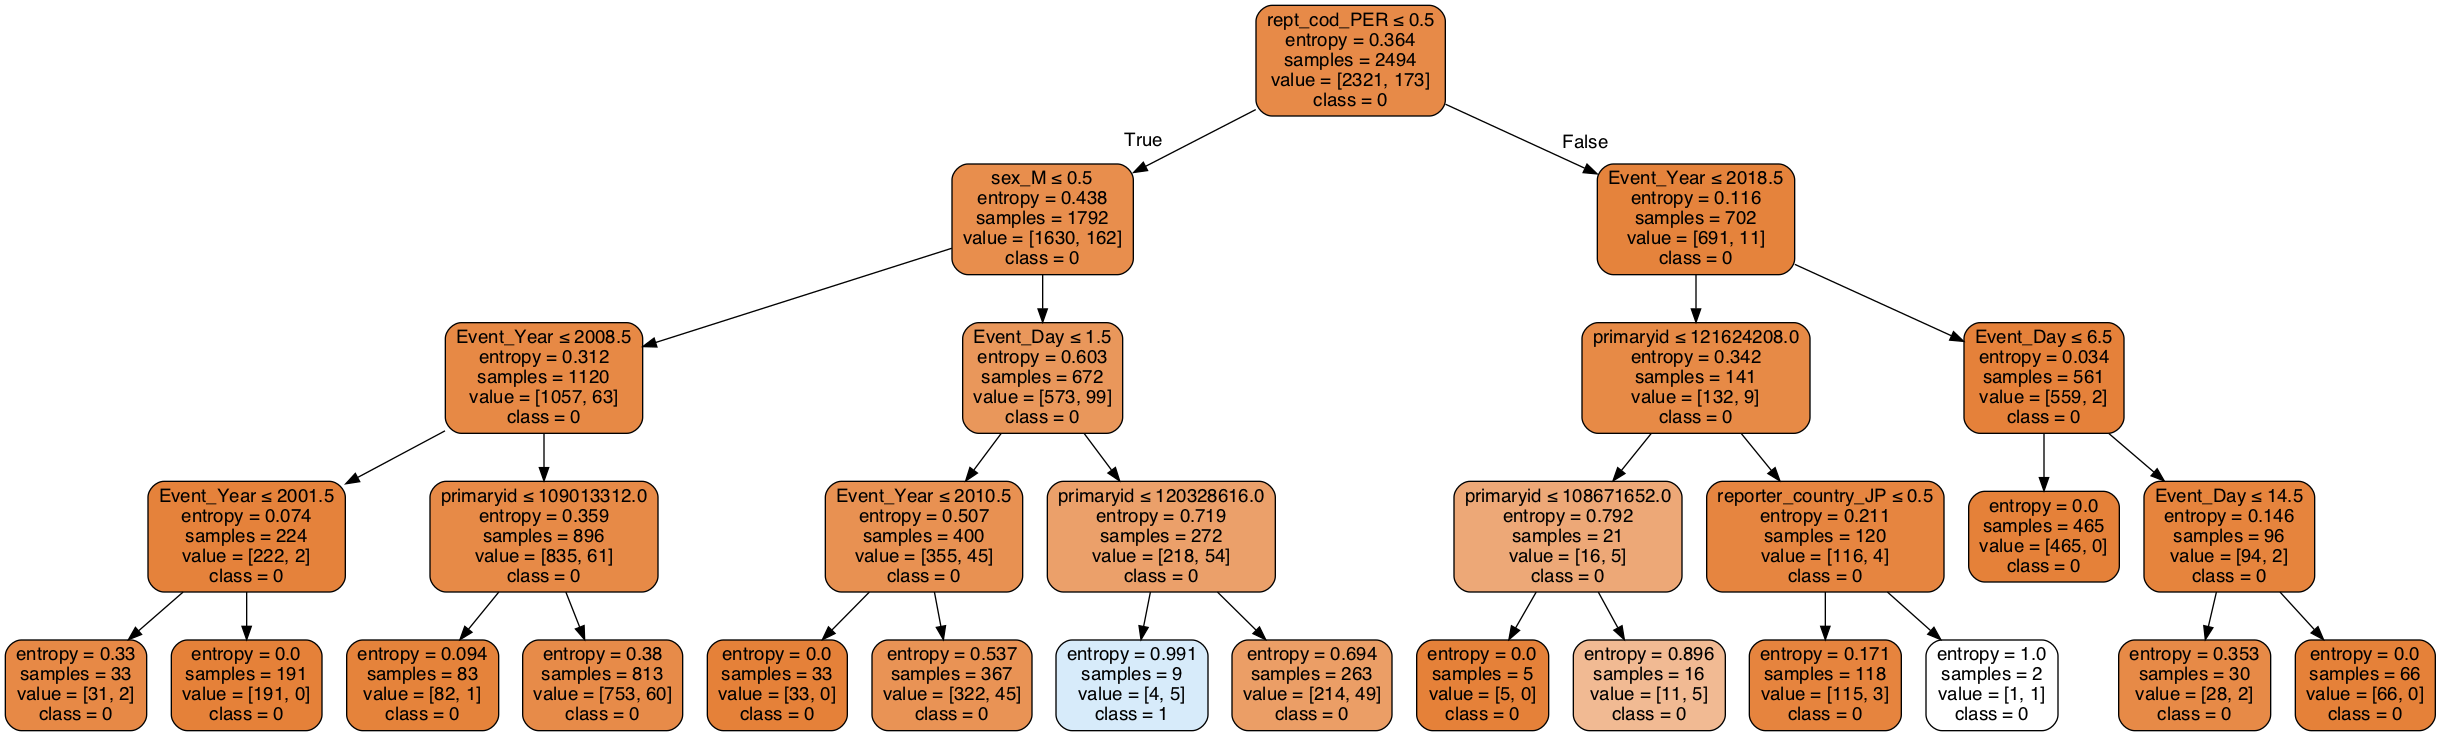

In [74]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data  = StringIO()
col_names_list_new = list(feature_cols.columns.values)

export_graphviz(DecsTreeModel, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = col_names_list_new, class_names=['0','1'])


graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

graph.write_png('Bank_DecsT.png',)
Image(graph.create_png())

In [67]:
from sklearn.metrics import accuracy_score,f1_score,recall_score,confusion_matrix,classification_report

y_pred= DecsTreeModel.predict(X_test)
ac_score=accuracy_score(y_test,y_pred)
print("Accuracy: {}".format(ac_score))

f1=f1_score(y_test, y_pred)
print("f1_score: {}".format(f1))

recall=recall_score(y_test, y_pred)
print("recall: {}".format(recall))

Accuracy: 0.9206730769230769
f1_score: 0.05714285714285714
recall: 0.03125


In [68]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.99      0.96       768
         1.0       0.33      0.03      0.06        64

    accuracy                           0.92       832
   macro avg       0.63      0.51      0.51       832
weighted avg       0.88      0.92      0.89       832



<Figure size 432x288 with 0 Axes>

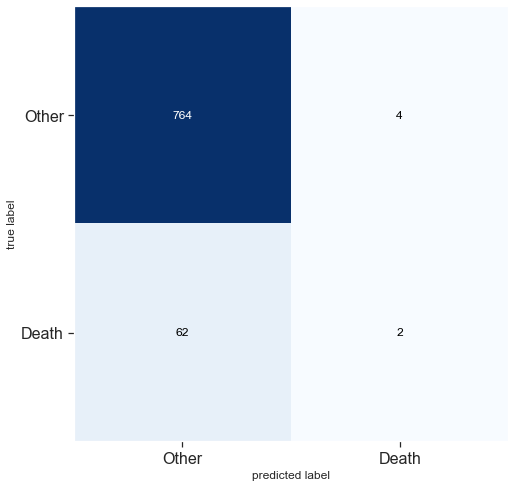

In [69]:
from mlxtend.plotting import plot_confusion_matrix

cm  = confusion_matrix(y_test, y_pred)
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Blues)
plt.xticks(range(2), ['Other', 'Death'], fontsize=16)
plt.yticks(range(2), ['Other', 'Death'], fontsize=16)
plt.show()

## Feature Importance

In [70]:
col_names_list_new = list(feature_cols.columns.values)

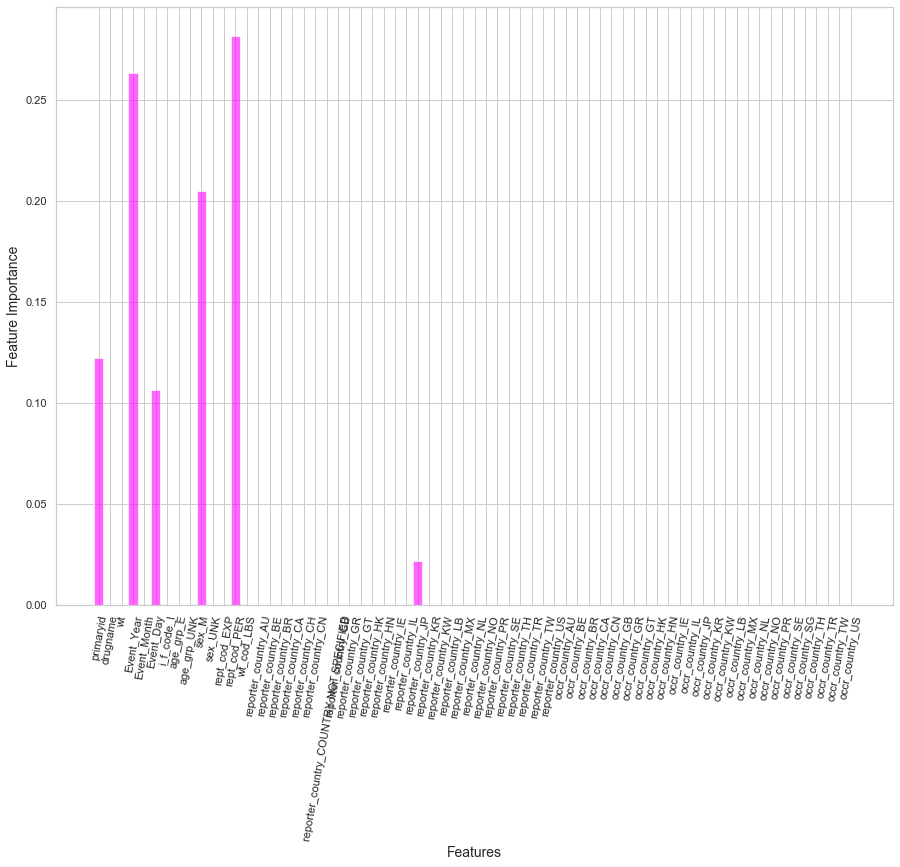

In [71]:
n_features = len(col_names_list_new)

sns.set(style="whitegrid")

fig = plt.figure(figsize=(15, 11))
fig.tight_layout()
plt.bar(range(n_features), DecsTreeModel.feature_importances_, color="magenta", align="center", alpha=0.6)
plt.xticks(np.arange(n_features), col_names_list_new, rotation=80, fontsize=11)
plt.xlabel("Features", fontsize=14)
plt.ylabel("Feature Importance", fontsize=14)
plt.savefig("Feature_Importance.png", dpi=300, bbox_inches='tight')